In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
import scipy.stats as stats
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv("market_data.csv")

In [6]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [12]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(['Low Fat','LF','low fat'],'LF')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(['Regular','reg'],'Reg')

In [13]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Reg,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [17]:
le = LabelEncoder()
data['Item_Fat_Content'] = le.fit_transform(data['Item_Fat_Content'])

In [20]:
data['Outlet_Location_Type'] = le.fit_transform(data['Outlet_Location_Type'])

In [27]:
data=data.dropna()

In [30]:
data['Outlet_Location_Type'].head()
data['Outlet_Size'].value_counts()
data['Outlet_Size'] = le.fit_transform(data['Outlet_Size'])
data['Outlet_Size'].value_counts

2    1860
1    1858
0     932
Name: Outlet_Size, dtype: int64

In [32]:
data.head()
data= data.drop(['Item_Identifier','Outlet_Establishment_Year'],axis=1)

In [38]:
data['Outlet_Location_Type'].value_counts()

2    1860
0    1860
1     930
Name: Outlet_Location_Type, dtype: int64

In [39]:
data['Outlet_Location_Type'] = le.fit_transform(data['Outlet_Location_Type'])

In [41]:
data['Outlet_Type'].value_counts()

Supermarket Type1    3722
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [44]:
data['Outlet_Type'] = le.fit_transform(data['Outlet_Type'])
data['Outlet_Identifier'].value_counts()

OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT018    928
Name: Outlet_Identifier, dtype: int64

In [47]:
data['Outlet_Identifier'] = le.fit_transform(data['Outlet_Identifier'])
data['Item_Type'].value_counts()

Fruits and Vegetables    670
Snack Foods              656
Household                498
Frozen Foods             477
Dairy                    380
Canned                   361
Baking Goods             351
Health and Hygiene       277
Soft Drinks              241
Meat                     221
Breads                   132
Hard Drinks              117
Others                    91
Starchy Foods             87
Breakfast                 58
Seafood                   33
Name: Item_Type, dtype: int64

In [80]:
data_num = pd.get_dummies(data)
data_num.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Baking Goods,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.300,0,0.016047,249.8092,4,1,0,0,3735.1380,0,...,0,0,0,0,0,0,0,0,0,0
1,5.920,1,0.019278,48.2692,1,1,2,1,443.4228,0,...,0,0,0,0,0,0,0,0,1,0
2,17.500,0,0.016760,141.6180,4,1,0,0,2097.2700,0,...,0,0,0,0,1,0,0,0,0,0
4,8.930,0,0.000000,53.8614,0,0,2,0,994.7052,0,...,0,0,0,1,0,0,0,0,0,0
5,10.395,1,0.000000,51.4008,1,1,2,1,556.6088,1,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# Standardization/Normalization
#min max scaler formula = xi-min(x)/max(x)-min(x) minimum value for this scaller is allways 0 and maximum is allways 1
# When ever you have outlier in your data do not use min-max scaler

In [79]:
# Robust scaler can be used when we need to work with data which have more outliers
# xi-Q1(x)/Q3(x)-Q1(x) for each feature 
sc = StandardScaler()
data_num_sc = sc.fit_transform(data_num)

C:\Users\jigyasu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jigyasu\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [69]:
data_num_sc = pd.DataFrame(data_num_sc)

In [70]:
data_num_sc.columns = data_num.columns

In [71]:
data_num_sc.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Baking Goods,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,-0.770517,-0.740227,-1.001154,1.731874,1.414062,-0.266543,-1.118034,-0.499328,0.976831,-0.285739,...,-0.410295,-0.160657,-0.251681,-0.346327,-0.223379,-0.141282,-0.084543,-0.405273,-0.233797,-0.138081
1,-1.494212,1.350937,-0.928714,-1.497218,-0.706575,-0.266543,1.118034,2.002692,-1.220864,-0.285739,...,-0.410295,-0.160657,-0.251681,-0.346327,-0.223379,-0.141282,-0.084543,-0.405273,4.277219,-0.138081
2,0.985195,-0.740227,-0.985173,-0.001575,1.414062,-0.266543,-1.118034,-0.499328,-0.116683,-0.285739,...,-0.410295,-0.160657,-0.251681,-0.346327,4.476687,-0.141282,-0.084543,-0.405273,-0.233797,-0.138081
3,-0.849738,-0.740227,-1.360945,-1.407620,-1.413454,-1.602132,1.118034,-0.499328,-0.852804,-0.285739,...,-0.410295,-0.160657,-0.251681,2.887447,-0.223379,-0.141282,-0.084543,-0.405273,-0.233797,-0.138081
4,-0.536065,1.350937,-1.360945,-1.447044,-0.706575,-0.266543,1.118034,2.002692,-1.145296,3.499695,...,-0.410295,-0.160657,-0.251681,-0.346327,-0.223379,-0.141282,-0.084543,-0.405273,-0.233797,-0.138081


In [85]:
min = MinMaxScaler()
minMax_min = min.fit_transform(data_num)
min_max_data = pd.DataFrame(minMax_min)
min_max_data.head()

C:\Users\jigyasu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.282525,0.0,0.085212,0.927446,1.00,0.5,0.0,0.0,0.359846,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.081274,1.0,0.102368,0.071280,0.25,0.5,1.0,1.0,0.036730,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.770765,0.0,0.088997,0.467837,1.00,0.5,0.0,0.0,0.199072,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.260494,0.0,0.000000,0.095036,0.00,0.0,1.0,0.0,0.090844,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.347723,1.0,0.000000,0.084583,0.25,0.5,1.0,1.0,0.047840,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
min_max_data.columns = data_num.columns

In [87]:
min_max_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Baking Goods,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,0.282525,0.0,0.085212,0.927446,1.00,0.5,0.0,0.0,0.359846,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.081274,1.0,0.102368,0.071280,0.25,0.5,1.0,1.0,0.036730,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.770765,0.0,0.088997,0.467837,1.00,0.5,0.0,0.0,0.199072,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.260494,0.0,0.000000,0.095036,0.00,0.0,1.0,0.0,0.090844,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.347723,1.0,0.000000,0.084583,0.25,0.5,1.0,1.0,0.047840,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
robust = RobustScaler()
data_num_robust = robust.fit_transform(data_num)
#data_num_robust.head()
data_num_robust_pd = pd.DataFrame(data_num_robust)

In [96]:
data_num_robust_pd.columns = data_num.columns
data_num_robust_pd.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Baking Goods,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,-0.407047,0.0,-0.535437,1.158610,1.0,0.0,-0.5,0.0,0.903804,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.817740,1.0,-0.483963,-1.027178,-0.5,0.0,0.5,1.0,-0.753310,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.589307,0.0,-0.524081,-0.014770,1.0,0.0,-0.5,0.0,0.079269,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.452005,0.0,-0.791099,-0.966528,-1.0,-1.0,0.5,0.0,-0.475783,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.273998,1.0,-0.791099,-0.993215,-0.5,0.0,0.5,1.0,-0.696330,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
normalizer = Normalizer()
data_num_normal = normalizer.fit_transform(data_num)
data_num_normal_pd = pd.DataFrame(data_num_normal)

In [100]:
data_num_normal_pd.columns = data_num.columns

In [101]:
data_num_normal_pd.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Baking Goods,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,0.002484,0.000000,0.000004,0.066732,0.001069,0.000267,0.000000,0.000000,0.997767,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.013271,0.002242,0.000043,0.108205,0.002242,0.002242,0.004483,0.002242,0.994017,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.002242,0.0
2,0.008325,0.000000,0.000008,0.067369,0.001903,0.000476,0.000000,0.000000,0.997691,0.000000,...,0.0,0.0,0.0,0.000000,0.000476,0.0,0.0,0.0,0.000000,0.0
3,0.008964,0.000000,0.000000,0.054067,0.000000,0.000000,0.002008,0.000000,0.998495,0.000000,...,0.0,0.0,0.0,0.001004,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.018593,0.001789,0.000000,0.091938,0.001789,0.001789,0.003577,0.001789,0.995577,0.001789,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0


In [107]:
#IQR = (Q3-Q1)
#upper = Q3 + 1.5 * IQR
#lower = Q1 - 1.5 * IQR

data3 = pd.read_csv('market_data.csv')
data3.head()
#data3.describe()
Q1 = data3['Item_Weight'].quantile(0.25)
Q3 = data3['Item_Weight'].quantile(0.75)

In [114]:
IQR = (Q3-Q1)
IQR

8.076250000000002

In [111]:
upper = Q3 + 1.5 * IQR
upper

28.964375000000004

In [112]:
lower = Q1 - 1.5 * IQR
lower

-3.340625000000003

In [126]:
data3['Item_Weight'] > upper
data3[data3['Item_Weight'] > upper]['Item_Weight'].count()

0

In [129]:
data3['Item_Weight'] < lower
data3[data3['Item_Weight'] < lower]['Item_Weight'].count()

0

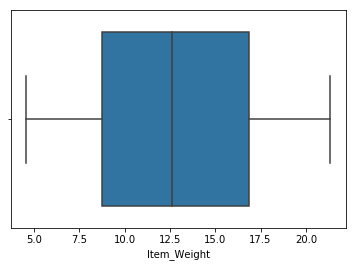

In [130]:
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline
sb.boxplot(data3['Item_Weight'])

In [131]:
Q1V = data3['Item_Visibility'].quantile(0.25)
Q3V = data3['Item_Visibility'].quantile(0.75)

In [132]:
IQRV = Q3V - Q1V
IQRV

0.067595815

In [135]:
upper1 = Q3V + 1.5 * IQRV
upper1

0.195979015

In [145]:
lower1 = Q1V - 1.5 * IQRV
lower1

-0.07440424500000001

In [144]:
data3[data3['Item_Visibility'] > upper1]['Item_Visibility'].count()

144

In [146]:
data3[data3['Item_Visibility'] < lower1]['Item_Visibility'].count()

0

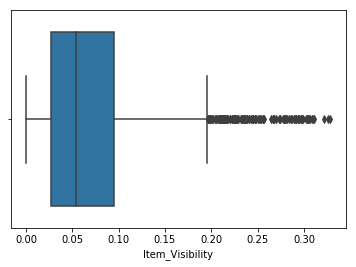

In [147]:
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline
sb.boxplot(data3['Item_Visibility'])

In [ ]:
# Replace all the upper bound outlier with 99 percentile value
# Replace all the upper bound outlier with 1 percentile value